# e23 Terrain Graph 2 Analysis

This notebook fetches runs from wandb tagged with `e23TG_neurogf_terrain_graph_2` and creates analysis plots.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import wandb_buddy as wb

## Notebook parameters

In [2]:
# Fetch runs with the specified tag
TAG = "e23TG_neurogf_terrain_graph_2"
ENTITY = "alelab"
PROJECT = "terrains"

# Use test_mae (computed from history) as the error metric
ERROR_COL = 'test_mae'
ERROR_LABEL = 'Test MAE'

## Fetch Runs from Wandb by Tag


In [3]:


print(f"Fetching runs with tag: {TAG}")
df = wb.load_runs(ENTITY, PROJECT, tags=[TAG])
print(f"Found {len(df)} runs")

Fetching runs with tag: e23TG_neurogf_terrain_graph_2


wandb: Currently logged in as: jotaporras (alelab) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Found 80 runs


In [4]:
df.head()

,name,id,state,created_at,heartbeat_at,tags,sweep_id,p,vn,new,...,sparse_gt_dropout,sparse_gt_num_hops,sparse_gt_input_dim,sparse_gt_num_heads,sparse_gt_hidden_dim,sparse_gt_num_layers,sparse_gt_output_dim,sparse_gt_attn_dropout,sparse_gt_rpearl_samples,sparse_gt_rpearl_num_layers
0,terrain-graph-TAGConv-res40-stage1,80eg729n,finished,2026-01-13T22:53:36Z,2026-01-14T02:54:20Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,terrain-graph-TAGConv-res40-stage1,8jrt6fb2,finished,2026-01-14T19:05:41Z,2026-01-14T20:03:44Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,terrain-graph-TAGConv-res40-stage1,8mmk9223,finished,2026-01-15T14:40:11Z,2026-01-17T12:19:12Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,terrain-graph-TAGConv-res36-stage1,sdg80scu,finished,2026-01-15T14:40:14Z,2026-01-17T12:14:32Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,terrain-graph-TAGConv-res37-stage1,0h390isk,finished,2026-01-15T14:40:15Z,2026-01-17T12:23:23Z,"[TAGConv, e23TG_neurogf_terrain_graph_2, stage...",None,4,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check available columns
print("Available columns:")
print(df.columns.tolist())

Available columns:
['name', 'id', 'state', 'created_at', 'heartbeat_at', 'tags', 'sweep_id', 'p', 'vn', 'new', 'aggr', 'trial', 'device', 'epochs', 'log_dir', 'siamese', 'finetune', 'loss_func', 'test_data', 'artificial', 'batch_size', 'layer_type', 'train_data', 'config_file', 'dataset_name', 'finetune_from', 'learning_rate', 'test_resolution', 'train_resolution', 'include_edge_attr', 'model_config_name', '_runtime', '_step', '_timestamp', '_wandb', 'epoch', 'final_train_loss', 'final_train_mae', 'final_train_mse', 'final_train_nmae', 'global_step', 'test_loss', 'test_mae', 'test_mse', 'test_nmae', 'train_loss', 'train_mae', 'train_mse', 'train_nmae', 'test_batch_loss', 'test_batch_mae', 'test_batch_mse', 'test_batch_nmae', 'val_loss', 'val_mae', 'val_mse', 'val_nmae', 'sparse_gt_dropout', 'sparse_gt_num_hops', 'sparse_gt_input_dim', 'sparse_gt_num_heads', 'sparse_gt_hidden_dim', 'sparse_gt_num_layers', 'sparse_gt_output_dim', 'sparse_gt_attn_dropout', 'sparse_gt_rpearl_samples', 'spa

In [6]:
# Extract resolution from dataset_name
def extract_resolution(row):
    dataset_name = str(row['dataset_name'])
    res_match = re.search(r'res(\d+)', dataset_name)
    return int(res_match.group(1))

df['resolution'] = df.apply(extract_resolution, axis=1)
print(f"Runs with valid resolution: {len(df)}")

Runs with valid resolution: 80


In [7]:
# Add density column (inverse of resolution squared)
df['density'] = 1 / (df['resolution'] ** 2)

print(f"Total runs: {len(df)}")
print(f"\nRuns by layer type:")
print(df['layer_type'].value_counts())
print(f"\nResolutions available:")
print(sorted(df['resolution'].unique()))

Total runs: 80

Runs by layer type:
layer_type
SparseGT    49
TAGConv     31
Name: count, dtype: int64

Resolutions available:
[np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40)]


## Compute Test MAE from Batch History

The training script logs `test_batch_mae` for each batch during the final test evaluation, but only the 
last value is captured in the run summary. To get the true test MAE, we need to fetch the full metric 
history from wandb and average over all logged batches.

This is necessary because:
1. `test_mae` (the summary metric) is only logged for runs that completed all epochs
2. `test_batch_mae` in the summary only contains the last batch's value, not the average
3. By fetching the history and averaging, we can compute the correct test MAE for all runs that started test evaluation

In [8]:
import wandb

def get_metric_history_mean(entity: str, project: str, run_id: str, metric: str) -> float:
    """
    Fetch the full history of a metric from a wandb run and return its mean.
    
    Args:
        entity: wandb entity/team name
        project: wandb project name  
        run_id: the run ID
        metric: name of the metric to fetch (e.g., 'test_batch_mae')
    
    Returns:
        Mean of all logged values for the metric, or NaN if no values exist
    """
    api = wandb.Api()
    run = api.run(f"{entity}/{project}/{run_id}")
    history = run.history(keys=[metric], pandas=True)
    
    if history.empty or metric not in history.columns:
        return np.nan
    
    values = history[metric].dropna()
    if len(values) == 0:
        return np.nan
    
    return values.mean()


def add_metric_from_history(df: pd.DataFrame, entity: str, project: str, 
                            source_metric: str, target_col: str) -> pd.DataFrame:
    """
    Add a new column to df by fetching metric history from wandb and computing the mean.
    
    Args:
        df: DataFrame with 'id' column containing wandb run IDs
        entity: wandb entity name
        project: wandb project name
        source_metric: metric name to fetch from history (e.g., 'test_batch_mae')
        target_col: name of the new column to add (e.g., 'test_mae_from_history')
    
    Returns:
        DataFrame with new column added
    """
    from tqdm import tqdm
    
    means = []
    for run_id in tqdm(df['id'], desc=f"Fetching {source_metric} history"):
        mean_val = get_metric_history_mean(entity, project, run_id, source_metric)
        means.append(mean_val)
    
    df[target_col] = means
    return df

In [9]:
# Fetch test_batch_mae history and compute mean for each run
df = add_metric_from_history(df, ENTITY, PROJECT, 'test_batch_mae', 'test_mae')

print(f"Runs with valid test_mae (from history): {df['test_mae'].notna().sum()} / {len(df)}")
print(f"\nBy layer_type:")
print(df.groupby('layer_type')['test_mae'].apply(lambda x: f"{x.notna().sum()}/{len(x)} valid"))

Fetching test_batch_mae history: 100%|██████████| 80/80 [01:22<00:00,  1.03s/it]

Runs with valid test_mae (from history): 73 / 80

By layer_type:
layer_type
SparseGT    49/49 valid
TAGConv     24/31 valid
Name: test_mae, dtype: object


In [10]:
df[['id','created_at','state','resolution','density','layer_type','test_batch_mae','test_mae']].head(25).sort_values('created_at', ascending=True)

,id,created_at,state,resolution,density,layer_type,test_batch_mae,test_mae
0,80eg729n,2026-01-13T22:53:36Z,finished,40,0.000625,TAGConv,NaN,NaN
1,8jrt6fb2,2026-01-14T19:05:41Z,finished,40,0.000625,TAGConv,NaN,NaN
2,8mmk9223,2026-01-15T14:40:11Z,finished,40,0.000625,TAGConv,NaN,NaN
3,sdg80scu,2026-01-15T14:40:14Z,finished,36,0.000772,TAGConv,NaN,NaN
4,0h390isk,2026-01-15T14:40:15Z,finished,37,0.000730,TAGConv,NaN,NaN
5,itvp59om,2026-01-15T14:40:15Z,finished,39,0.000657,TAGConv,NaN,NaN
6,pehei5yb,2026-01-15T14:40:15Z,finished,38,0.000693,TAGConv,NaN,NaN
7,kk0krllh,2026-01-17T20:02:20Z,finished,39,0.000657,TAGConv,0.175213,0.165233
8,w50g89x2,2026-01-17T20:02:20Z,finished,40,0.000625,TAGConv,0.197514,0.187323
9,53oj07c9,2026-01-17T20:02:27Z,finished,38,0.000693,TAGConv,0.204143,0.195022


In [11]:


# Check how many runs have valid test_mae values
print(f"Runs with valid {ERROR_COL}: {df[ERROR_COL].notna().sum()} / {len(df)}")
print(f"\nBy layer_type:")
print(df.groupby('layer_type')[ERROR_COL].apply(lambda x: f"{x.notna().sum()}/{len(x)} valid"))

print("\nSample data:")
#df[['name', 'layer_type', 'resolution', 'density', 'stage', ERROR_COL]].head(10)
df[['name', 'layer_type', 'resolution', 'density', ERROR_COL]].head(10)

Runs with valid test_mae: 73 / 80

By layer_type:
layer_type
SparseGT    49/49 valid
TAGConv     24/31 valid
Name: test_mae, dtype: object

Sample data:


,name,layer_type,resolution,density,test_mae
0,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
1,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
2,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
3,terrain-graph-TAGConv-res36-stage1,TAGConv,36,0.000772,NaN
4,terrain-graph-TAGConv-res37-stage1,TAGConv,37,0.000730,NaN
5,terrain-graph-TAGConv-res39-stage1,TAGConv,39,0.000657,NaN
6,terrain-graph-TAGConv-res38-stage1,TAGConv,38,0.000693,NaN
7,terrain-graph-TAGConv-res39-stage1,TAGConv,39,0.000657,0.165233
8,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,0.187323
9,terrain-graph-TAGConv-res38-stage1,TAGConv,38,0.000693,0.195022


In [12]:
# Check all test-related columns and their coverage
test_cols = [c for c in df.columns if 'test' in c.lower()]
print("Test metric coverage by layer_type:\n")
for col in test_cols:
    valid_counts = df.groupby('layer_type')[col].apply(lambda x: x.notna().sum())
    total_counts = df.groupby('layer_type').size()
    print(f"{col}:")
    for lt in valid_counts.index:
        print(f"  {lt}: {valid_counts[lt]}/{total_counts[lt]}")
    print()

Test metric coverage by layer_type:

test_data:
  SparseGT: 49/49
  TAGConv: 31/31

test_resolution:
  SparseGT: 49/49
  TAGConv: 31/31

test_loss:
  SparseGT: 0/49
  TAGConv: 7/31

test_mae:
  SparseGT: 49/49
  TAGConv: 24/31

test_mse:
  SparseGT: 0/49
  TAGConv: 7/31

test_nmae:
  SparseGT: 0/49
  TAGConv: 7/31

test_batch_loss:
  SparseGT: 49/49
  TAGConv: 24/31

test_batch_mae:
  SparseGT: 49/49
  TAGConv: 24/31

test_batch_mse:
  SparseGT: 49/49
  TAGConv: 24/31

test_batch_nmae:
  SparseGT: 49/49
  TAGConv: 24/31



In [13]:
df.sort_values('resolution', ascending=False)[['name', 'layer_type', 'resolution', 'density', ERROR_COL]]

,name,layer_type,resolution,density,test_mae
0,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
1,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
2,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,NaN
8,terrain-graph-TAGConv-res40-stage1,TAGConv,40,0.000625,0.187323
15,terrain-graph-SparseGT-res40-stage1,SparseGT,40,0.000625,0.190540
...,...,...,...,...,...
75,terrain-graph-SparseGT-res17-stage1,SparseGT,17,0.003460,0.153798
76,terrain-graph-SparseGT-res16-stage1,SparseGT,16,0.003906,0.150643
77,terrain-graph-SparseGT-res15-stage1,SparseGT,15,0.004444,0.155172
78,terrain-graph-SparseGT-res14-stage1,SparseGT,14,0.005102,0.157749


## Performance Plot


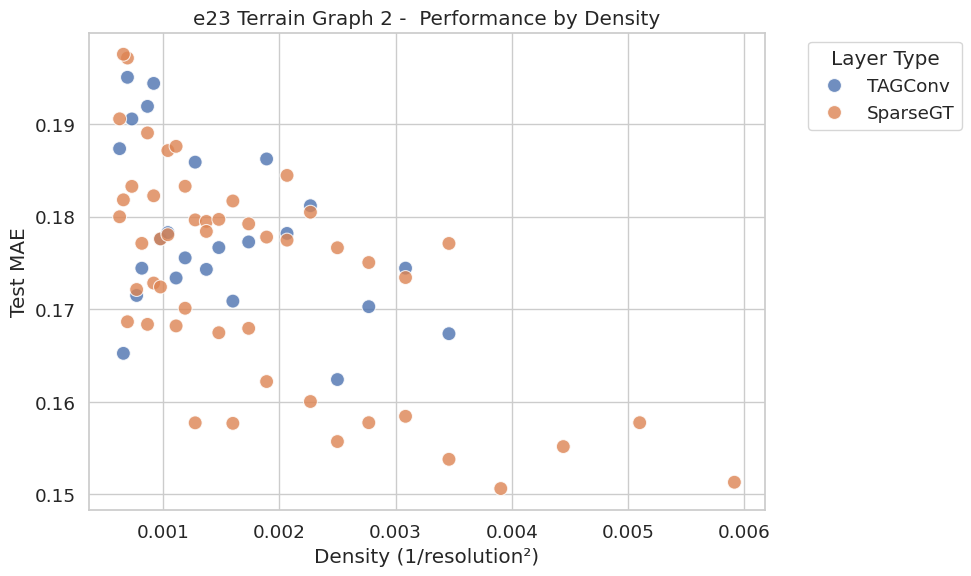

In [14]:
# Set plot style
sns.set_theme(style="whitegrid", font_scale=1.2)

df_plot = df

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='density',
    y=ERROR_COL,
    hue='layer_type',
    s=100,
    alpha=0.8,
    ax=ax
)

ax.set_xlabel('Density (1/resolution²)')
ax.set_ylabel(ERROR_LABEL)
ax.set_title(f'e23 Terrain Graph 2 -  Performance by Density')
ax.legend(title='Layer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

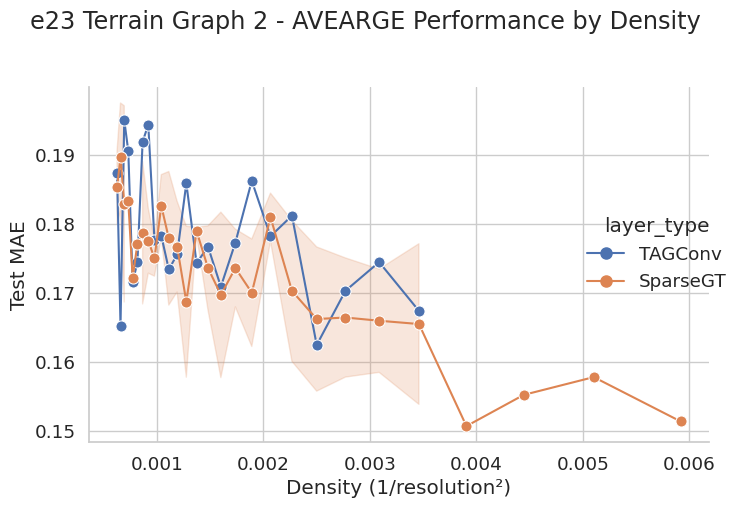

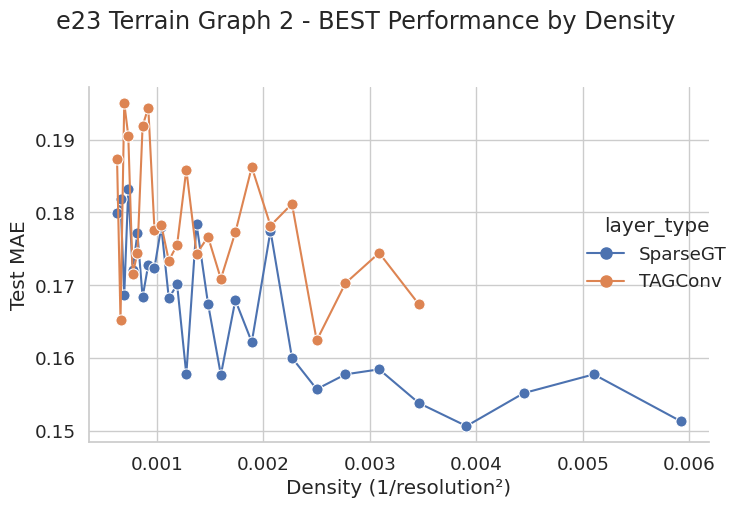

In [15]:
# Best performance per density per layer_type
# Filter out rows with NaN in ERROR_COL before groupby to avoid KeyError
df_valid = df.dropna(subset=[ERROR_COL])
best_per_density = df_valid.loc[df_valid.groupby(['layer_type', 'density'])[ERROR_COL].idxmin()]
df_plot = df_valid
# df_plot = best_per_density
g2 = sns.relplot(
    data=df_plot,
    x='density',
    y=ERROR_COL,
    hue='layer_type',
    kind='line',
    marker='o',
    markersize=8,
    height=5,
    aspect=1.2
)

g2.set_axis_labels('Density (1/resolution²)', ERROR_LABEL)
g2.fig.suptitle(f'e23 Terrain Graph 2 - AVEARGE Performance by Density', y=1.02)

plt.tight_layout()
plt.show()

df_plot = best_per_density
g2 = sns.relplot(
    data=df_plot,
    x='density',
    y=ERROR_COL,
    hue='layer_type',
    kind='line',
    marker='o',
    markersize=8,
    height=5,
    aspect=1.2
)

g2.set_axis_labels('Density (1/resolution²)', ERROR_LABEL)
g2.fig.suptitle(f'e23 Terrain Graph 2 - BEST Performance by Density', y=1.02)

plt.tight_layout()
plt.show()

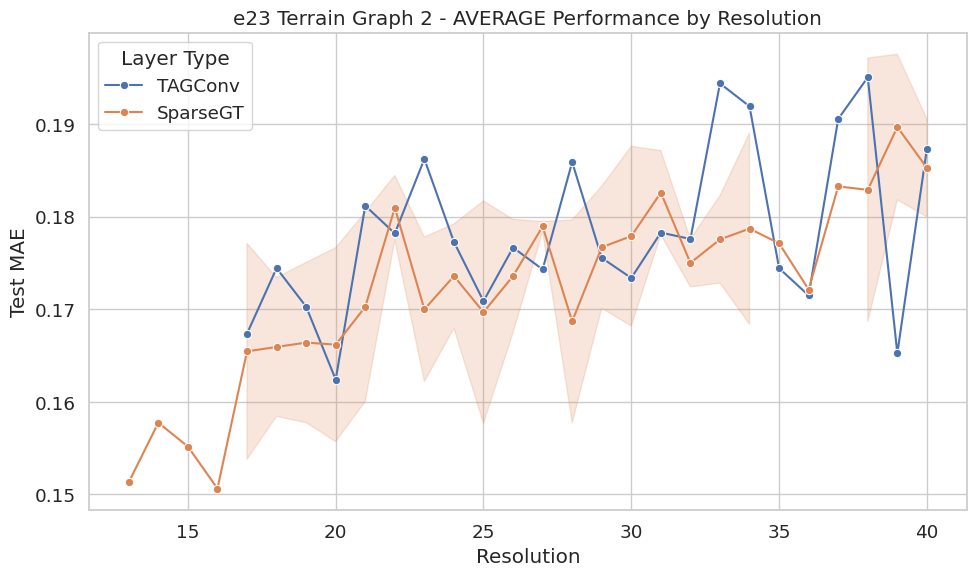

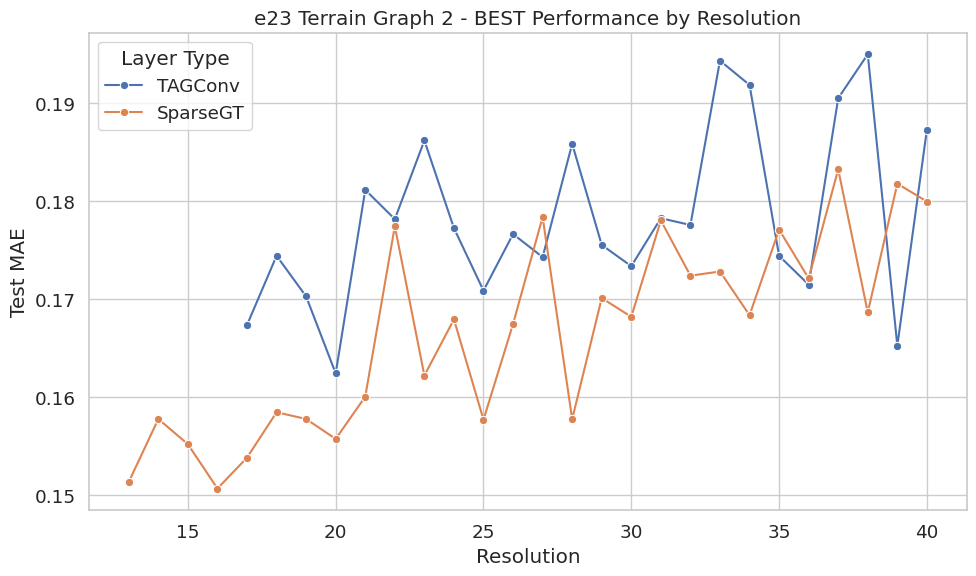

In [16]:
# Performance by resolution (easier to interpret)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=df_valid.sort_values("layer_type",ascending=False),
    x='resolution',
    y=ERROR_COL,
    hue='layer_type',
    marker='o',
    ax=ax
)

ax.set_xlabel('Resolution')
ax.set_ylabel(ERROR_LABEL)
ax.set_title('e23 Terrain Graph 2 - AVERAGE Performance by Resolution')
ax.legend(title='Layer Type')

plt.tight_layout()
plt.show()

# Performance by resolution (easier to interpret)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=best_per_density.sort_values("layer_type",ascending=False),
    x='resolution',
    y=ERROR_COL,
    hue='layer_type',
    marker='o',
    ax=ax
)

ax.set_xlabel('Resolution')
ax.set_ylabel(ERROR_LABEL)
ax.set_title('e23 Terrain Graph 2 - BEST Performance by Resolution')
ax.legend(title='Layer Type')

plt.tight_layout()
plt.show()

## Summary Statistics


In [17]:
# Summary table by resolution and layer_type
print("Summary by resolution and layer_type:")
summary = df.groupby(['resolution', 'layer_type'])[ERROR_COL].agg(['mean', 'std', 'count']).round(4)
summary

Summary by resolution and layer_type:


mean     std  count
resolution layer_type                       
13         SparseGT    0.1513     NaN      1
14         SparseGT    0.1577     NaN      1
15         SparseGT    0.1552     NaN      1
16         SparseGT    0.1506     NaN      1
17         SparseGT    0.1654  0.0165      2
           TAGConv     0.1674     NaN      1
18         SparseGT    0.1659  0.0106      2
           TAGConv     0.1744     NaN      1
19         SparseGT    0.1664  0.0122      2
           TAGConv     0.1703     NaN      1
20         SparseGT    0.1662  0.0148      2
           TAGConv     0.1624     NaN      1
21         SparseGT    0.1702  0.0144      2
           TAGConv     0.1812     NaN      1
22         SparseGT    0.1809  0.0049      2
           TAGConv     0.1782     NaN      1
23         SparseGT    0.1700  0.0110      2
           TAGConv     0.1862     NaN      1
24         SparseGT    0.1736  0.0080      2
           TAGConv     0.1773     NaN      1
25         SparseGT    0.1697  0.0170      2
           TAGConv     0.1709     NaN      1
26         SparseGT    0.1736  0.0086      2
           TAGConv     0.1766     NaN      1
27         SparseGT    0.1789  0.0008      2
           TAGConv     0.1743     NaN      1
28         SparseGT    0.1687  0.0155      2
           TAGConv     0.1859     NaN      1
29         SparseGT    0.1767  0.0093      2
           TAGConv     0.1755     NaN      1
30         SparseGT    0.1779  0.0137      2
           TAGConv     0.1734     NaN      1
31         SparseGT    0.1826  0.0064      2
           TAGConv     0.1783     NaN      1
32         SparseGT    0.1750  0.0037      2
           TAGConv     0.1776     NaN      1
33         SparseGT    0.1775  0.0067      2
           TAGConv     0.1944     NaN      1
34         SparseGT    0.1787  0.0146      2
           TAGConv     0.1919     NaN      1
35         SparseGT    0.1771     NaN      1
           TAGConv     0.1744     NaN      1
36         SparseGT    0.1721     NaN      1
           TAGConv     0.1715     NaN      1
37         SparseGT    0.1833     NaN      1
           TAGConv     0.1905     NaN      1
38         SparseGT    0.1829  0.0201      2
           TAGConv     0.1950     NaN      1
39         SparseGT    0.1897  0.0111      2
           TAGConv     0.1652     NaN      1
40         SparseGT    0.1853  0.0075      2
           TAGConv     0.1873     NaN      1

In [18]:
# Best performing runs
print("Best performing runs:")
df_valid = df.dropna(subset=[ERROR_COL])
best_run = df_valid.loc[df_valid[ERROR_COL].idxmin()]
print(f"\nBest Overall:")
print(f"  Run: {best_run['name']}")
print(f"  Layer Type: {best_run['layer_type']}")
print(f"  Resolution: {best_run['resolution']}")
print(f"  {ERROR_LABEL}: {best_run[ERROR_COL]:.6f}")

Best performing runs:

Best Overall:
  Run: terrain-graph-SparseGT-res16-stage1
  Layer Type: SparseGT
  Resolution: 16
  Test MAE: 0.150643


In [19]:
# Comparison between layer types
print(f"\nMean Error by Layer Type:")
layer_summary = df.groupby('layer_type')[ERROR_COL].agg(['mean', 'std', 'min', 'max', 'count'])
layer_summary


Mean Error by Layer Type:


,mean,std,min,max,count
layer_type,,,,,
SparseGT,0.173443,0.011801,0.150643,0.197511,49
TAGConv,0.178330,0.009024,0.162406,0.195022,24
